# Optimización Económica de Riego y Productividad

Consideramos un lote agrícola cuya **productividad depende del nivel de riego**.
El riego incrementa la productividad, pero con **rendimientos marginales decrecientes**,
y además tiene un **costo económico**.

El objetivo es **maximizar el beneficio económico total**, no la productividad física.


## 1️⃣ Variables y supuestos

### Variable de decisión
- $ R $: Nivel de riego aplicado \([mm]\)

### Parámetros económicos
- $ p_y $: Precio del producto agrícola ($/ton)

- $ c_r $: Costo unitario del riego ($/mm)

### Funciones
- Productividad:
$$
Y(R) = a \ln(1 + R)
$$
(Rendimientos marginales decrecientes)

- Ingreso:
$$
I(R) = p_y \cdot Y(R)
$$

- Costo:
$$
C(R) = c_r \cdot R
$$

- Beneficio económico:
$$
\Pi(R) = I(R) - C(R)
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Parámetros
a = 10.0      # productividad potencial
p_y = 50.0    # $/ton
c_r = 20.0    # $/mm

# Variable de decisión
R = np.linspace(0, 20, 400)

# Funciones
Y = a * np.log(1 + R)
Ingreso = p_y * Y
Costo = c_r * R
Beneficio = Ingreso - Costo


In [5]:
# Óptimo económico
idx_opt = np.argmax(Beneficio)
R_opt = R[idx_opt]
Pi_opt = Beneficio[idx_opt]

R_opt, Pi_opt


(np.float64(20.0), np.float64(1122.2612188617115))

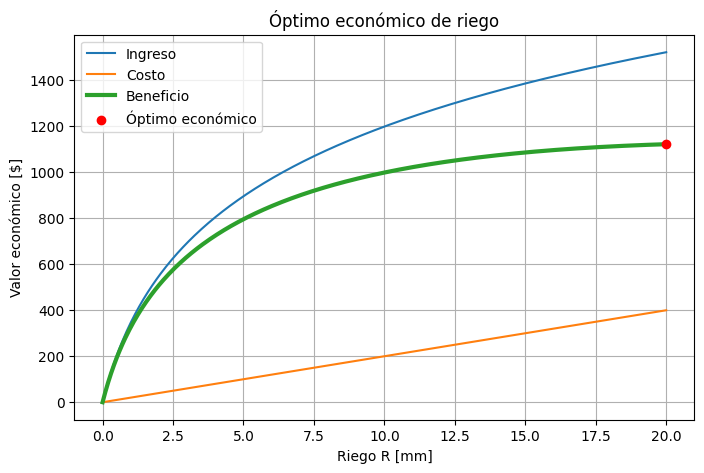

In [6]:
# Gráfica 2D
plt.figure(figsize=(8,5))
plt.plot(R, Ingreso, label="Ingreso")
plt.plot(R, Costo, label="Costo")
plt.plot(R, Beneficio, label="Beneficio", linewidth=3)
plt.scatter(R_opt, Pi_opt, color='red', zorder=5, label="Óptimo económico")

plt.xlabel("Riego R [mm]")
plt.ylabel("Valor económico [$]")
plt.title("Óptimo económico de riego")
plt.legend()
plt.grid(True)
plt.show()


### Interpretación económica

- La productividad **siempre aumenta** con el riego.
- El ingreso también aumenta, pero cada vez más lento.
- El costo crece linealmente.
- El óptimo ocurre cuando:

$$
\frac{d\Pi}{dR} = 0
\quad \Rightarrow \quad
\text{Beneficio marginal} = \text{Costo marginal}
$$

Este enfoque funciona **solo porque el problema es unidimensional y suave**.


## 2️⃣ Productividad con riego y temperatura

Ahora supongamos que la productividad también depende de la **temperatura ambiente** $T$.

Ejemplo:
$$
Y(R, T) =
a \ln(1 + R)\;
\exp\!\left(-\frac{(T - T^*)^2}{\sigma^2}\right)
$$

- Existe una temperatura óptima $T^*$
- El efecto del riego depende del clima


In [8]:
# Dominio
R = np.linspace(0, 20, 200)
T = np.linspace(10, 40, 200)
R_mesh, T_mesh = np.meshgrid(R, T)

# Parámetros térmicos
T_star = 25.0
sigma = 6.0

# Productividad
Y_RT = (
    a * np.log(1 + R_mesh) *
    np.exp(-((T_mesh - T_star)**2) / sigma**2)
)

# Beneficio
Ingreso_RT = p_y * Y_RT
Costo_RT = c_r * R_mesh
Beneficio_RT = Ingreso_RT - Costo_RT


In [9]:
# Óptimo global
idx = np.unravel_index(np.argmax(Beneficio_RT), Beneficio_RT.shape)
R_opt, T_opt = R_mesh[idx], T_mesh[idx]
Pi_opt = Beneficio_RT[idx]

R_opt, T_opt, Pi_opt


(np.float64(20.0),
 np.float64(24.924623115577887),
 np.float64(1122.0209880120678))

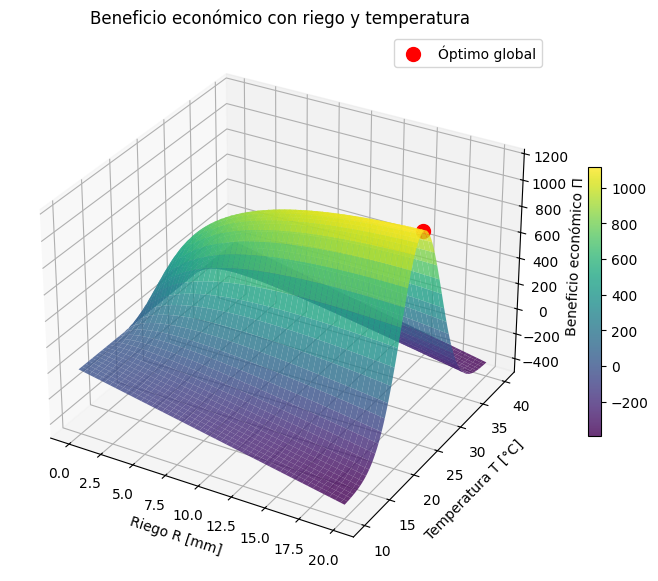

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(
    R_mesh, T_mesh, Beneficio_RT,
    cmap='viridis', alpha=0.8
)

ax.scatter(R_opt, T_opt, Pi_opt,
           color='red', s=100, label="Óptimo global")

ax.set_xlabel("Riego R [mm]")
ax.set_ylabel("Temperatura T [°C]")
ax.set_zlabel("Beneficio económico Π")
ax.set_title("Beneficio económico con riego y temperatura")
ax.legend()
fig.colorbar(surf, shrink=0.5)
plt.show()


## 3️⃣ Por qué este problema ya no es trivial

- El óptimo depende de **interacciones no lineales**.
- El beneficio marginal del riego **ya no es único**, depende de $T$.
- En la práctica:
  - El agricultor **no controla la temperatura**
  - El sistema puede cambiar día a día
- Métodos basados en:
$$
\frac{\partial \Pi}{\partial R} = 0
$$
son **locales**.

Este tipo de problema es ideal para:
- Optimización global
- Aprendizaje por refuerzo (SAC)
- Rewards basados en beneficio económico observado
